train loss:2.29988642894
=== epoch:1, train acc:0.133, test acc:0.15 ===
train loss:2.29769014488
train loss:2.29169622301
train loss:2.28654533096
train loss:2.26972808841
train loss:2.25951549934
train loss:2.26348675297
train loss:2.23568085518
train loss:2.21598262956
train loss:2.18097814438
train loss:2.16703130357
train loss:2.09845269829
train loss:2.08563838549
train loss:2.01981313613
train loss:1.9288461639
train loss:1.83659575187
train loss:1.88833548175
train loss:1.74786736829
train loss:1.68356227715
train loss:1.62928700334
train loss:1.55014037496
train loss:1.43046352802
train loss:1.34454010215
train loss:1.2360293879
train loss:1.2198412348
train loss:1.16007416107
train loss:0.921281498449
train loss:1.04471436075
train loss:0.972366108948
train loss:0.830006687256
train loss:0.741481509883
train loss:0.77001866563
train loss:0.811603117172
train loss:0.709033085796
train loss:0.655140180935
train loss:0.692902596588
train loss:0.791449717156
train loss:0.58300716

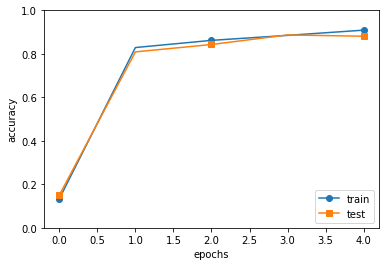

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()